In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [29]:
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
print("Libraries imported successfully!")

df = pd.read_excel("Madinaty FP#2 June Oos.xlsx",sheet_name='Internal Requests')

print(f"Original data shape: {df.shape}")

df.head(3)

Libraries imported successfully!
Original data shape: (24, 25)


,Source System Ticket Id,Ticket Created At eet,Delivery Person Action,Is Fully Scanned,Ticket Type,internal_request,internal_request_type,Ticket Subject,Hrid,DA Name,...,Sub Order Type,Delivery Model,Order Status,Sub Order Status,Delivered At Eet,Internal Category Name,Main Category Name,Product Name,Picker Hrid (Dim Customers),Picker Name
0,6783073,6/1/2025 2:59:39 AM,NaN,True,internal requests,Missing items - stock issue,Order fulfillment,#3123-30675157 [Item(s) Missing] reported by E...,23694,Ahmed Ali Mohamed,...,NaN,now,completed,NaN,6/1/2025 3:52:19 AM,Snacks,Snacks,Hohos King Uncoated Strawberry (Piece),22532,Fares Ahmed
1,6786156,6/1/2025 5:10:24 PM,NaN,True,internal requests,Missing items - stock issue,Order fulfillment,#0114-08524561 [Other] reported by Mohamed Saleh,34805,Ahmed Gharib,...,NaN,now,completed,NaN,6/1/2025 5:21:08 PM,NaN,NaN,NaN,33798,Zieyad Ahmed
2,6786159,6/1/2025 5:10:57 PM,NaN,True,internal requests,Missing items - stock issue,Order fulfillment,#0114-08524561 [Item(s) Missing] reported by M...,34805,Ahmed Gharib,...,NaN,now,completed,NaN,6/1/2025 5:21:08 PM,Soda,Beverages,"Red Bull Energy Drink, Blueberry (250ml)",33798,Zieyad Ahmed


In [30]:
df = df.rename(columns={
    'Main Category Name': 'Main_Category',
    'Product Name': 'Product',
    'Ticket Created At eet': 'Report_Time',
    'FP Name': 'Facility'
})




In [31]:
def extract_reporter(subject):
    match = re.search(r'reported by (.+)$', str(subject))
    return match.group(1).strip() if match else "Unknown"

df['Reporter'] = df['Ticket Subject'].apply(extract_reporter)

In [32]:
df['Report_Time'] = pd.to_datetime(df['Report_Time'], errors='coerce')
df = df.dropna(subset=['Report_Time'])
df['Day'] = df['Report_Time'].dt.day_name()
df['Hour'] = df['Report_Time'].dt.hour
df['Date'] = df['Report_Time'].dt.date

In [33]:
df['Main_Category'] = df['Main_Category'].fillna('Undefined')
df['Main_Category'] = df['Main_Category'].replace('', 'Undefined')

print(f"Processed data shape: {df.shape}")
df.head(2)

Processed data shape: (24, 29)


,Source System Ticket Id,Report_Time,Delivery Person Action,Is Fully Scanned,Ticket Type,internal_request,internal_request_type,Ticket Subject,Hrid,DA Name,...,Delivered At Eet,Internal Category Name,Main_Category,Product,Picker Hrid (Dim Customers),Picker Name,Reporter,Day,Hour,Date
0,6783073,2025-06-01 02:59:39,NaN,True,internal requests,Missing items - stock issue,Order fulfillment,#3123-30675157 [Item(s) Missing] reported by E...,23694,Ahmed Ali Mohamed,...,6/1/2025 3:52:19 AM,Snacks,Snacks,Hohos King Uncoated Strawberry (Piece),22532,Fares Ahmed,Ehab Talaat,Sunday,2,2025-06-01
1,6786156,2025-06-01 17:10:24,NaN,True,internal requests,Missing items - stock issue,Order fulfillment,#0114-08524561 [Other] reported by Mohamed Saleh,34805,Ahmed Gharib,...,6/1/2025 5:21:08 PM,NaN,Undefined,NaN,33798,Zieyad Ahmed,Mohamed Saleh,Sunday,17,2025-06-01


In [6]:
df['Main_Category']

0                   Snacks
1                Undefined
2                Beverages
3                 Pharmacy
4                Beverages
5                Beverages
6                 Pharmacy
7                Beverages
8      Bakeries & Pastries
9     Desserts & Ice Cream
10     Fruits & Vegetables
11                Pharmacy
12           Baby Products
13                  Summer
14                  Snacks
15                  Snacks
16    Desserts & Ice Cream
17               Beverages
18                Pharmacy
19     Bakeries & Pastries
20               Beverages
21                  Snacks
22                  Snacks
23                  Snacks
Name: Main_Category, dtype: object

In [34]:
df['Reporter'] = df['Reporter'].str.strip()

df['Reporter']

0       Ehab  Talaat
1      Mohamed Saleh
2      Mohamed Saleh
3      Mohamed Saleh
4      Mohamed Saleh
5      Mohamed Saleh
6        Ahmed Sayed
7       Ehab  Talaat
8     Mohammed Saeed
9       Ehab  Talaat
10     Mohamed Saleh
11     Mohamed Saleh
12     Mohamed Saleh
13    Mohamed Deegoo
14    Mohamed Deegoo
15    Mohamed Deegoo
16     Mohamed Saleh
17     Mohamed Saleh
18     Mohamed Saleh
19    Mohammed Saeed
20    Mohammed Saeed
21    Mohammed Saeed
22     Mohamed Saleh
23     Mohamed Saleh
Name: Reporter, dtype: object

Text(0, 0.5, 'Category')

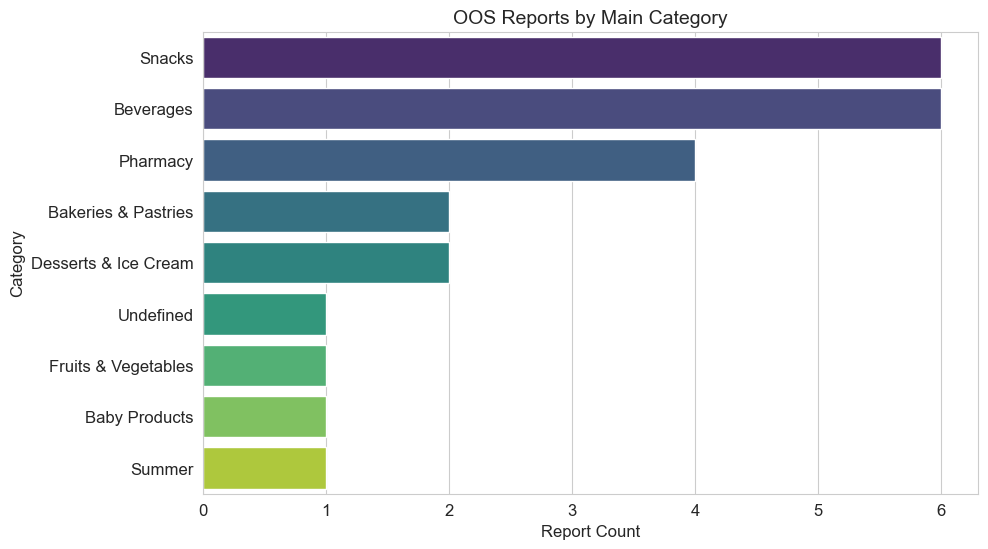

In [10]:
plt.figure(figsize=(10, 6))
category_counts = df['Main_Category'].value_counts()
ax = sns.barplot(
    x=category_counts.values, 
    y=category_counts.index,
    palette="viridis"
)
plt.title('OOS Reports by Main Category', fontsize=14)
plt.xlabel('Report Count')
plt.ylabel('Category')


Text(0.5, 1.0, 'OOS Reports Distribution by Main Category')

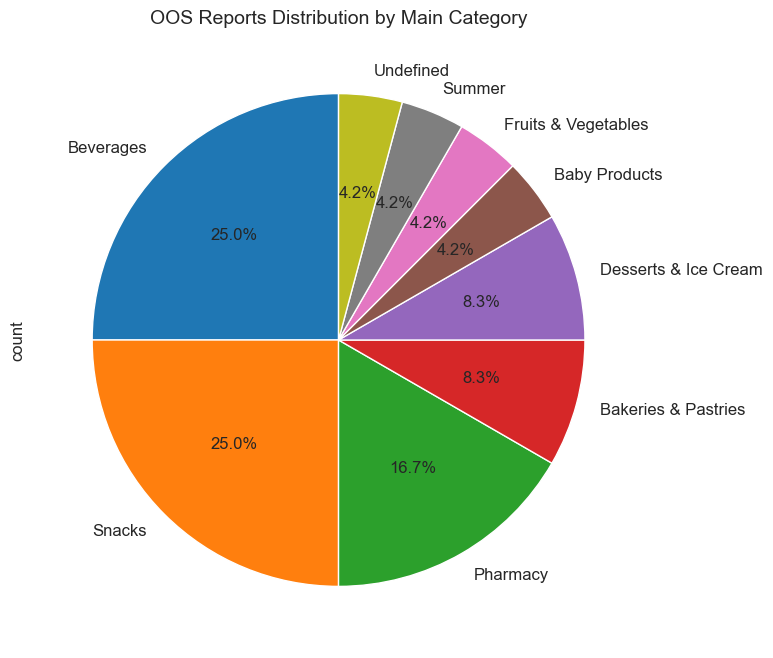

In [37]:
df.value_counts('Main_Category').plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('OOS Reports Distribution by Main Category', fontsize=14)

<Figure size 640x480 with 0 Axes>

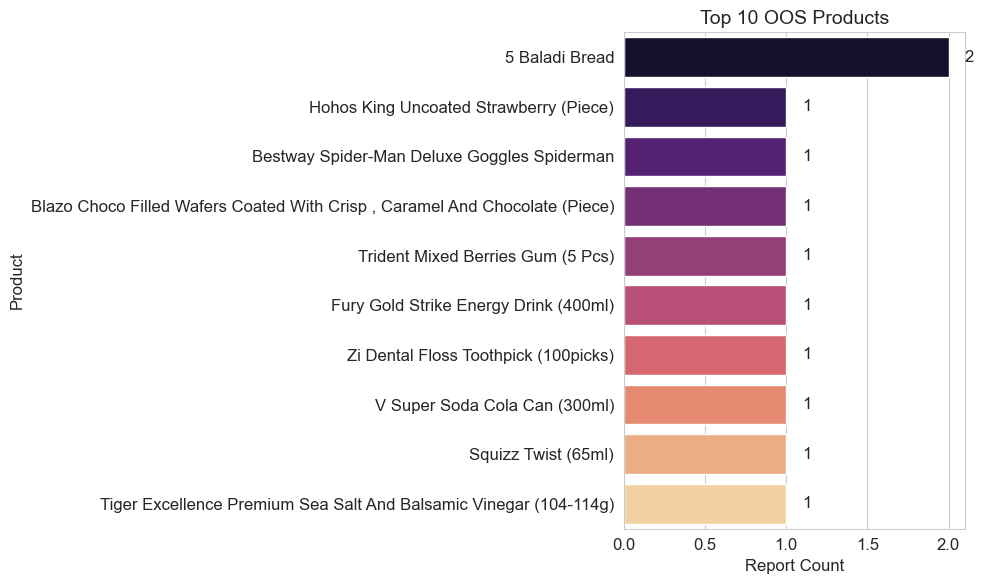

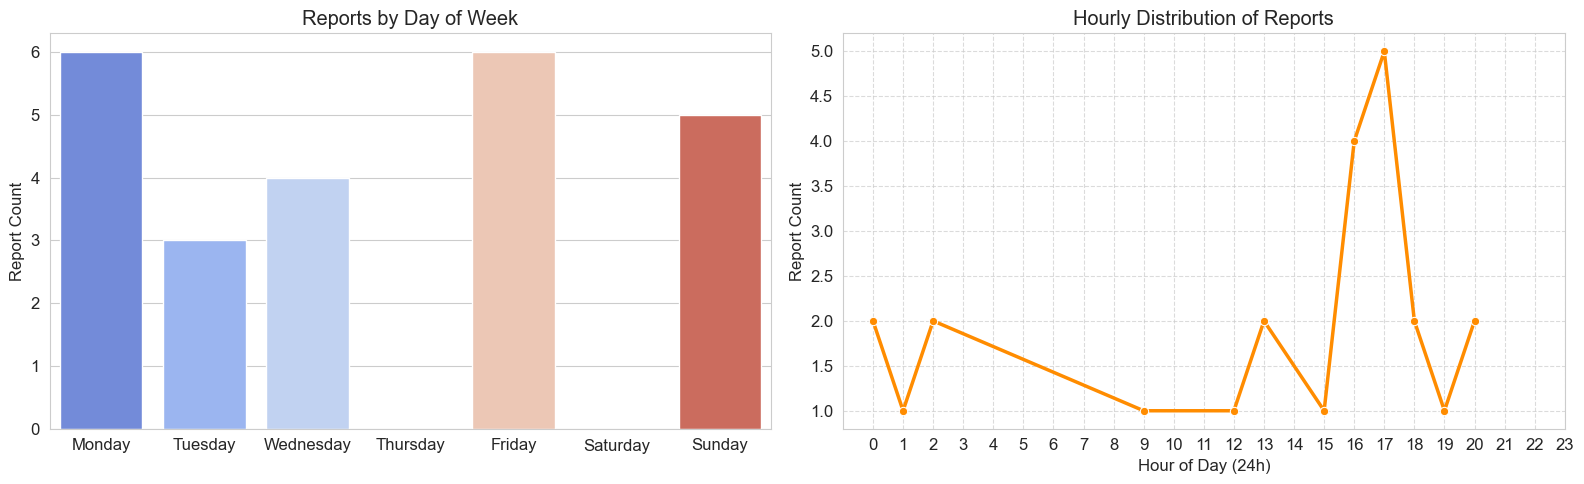

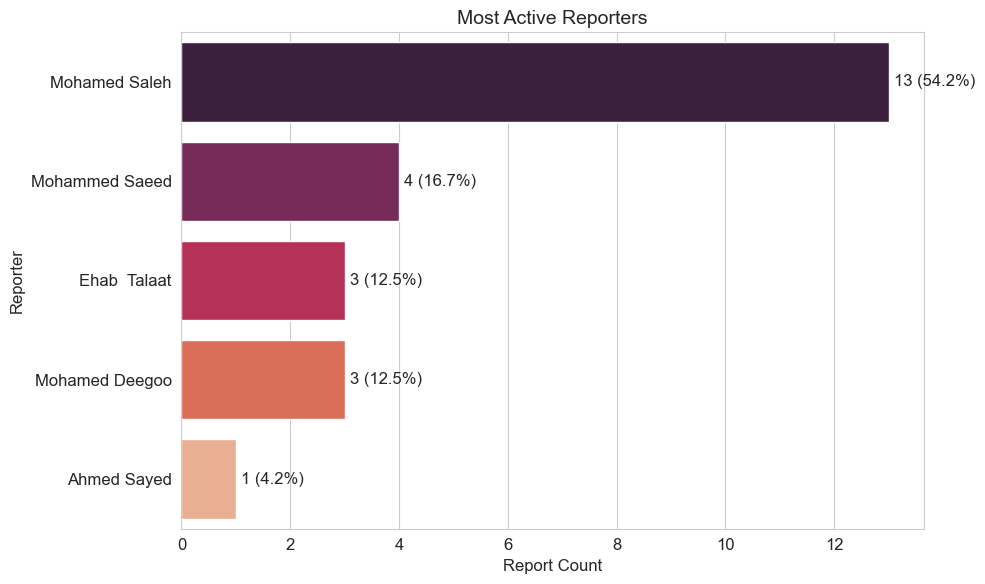

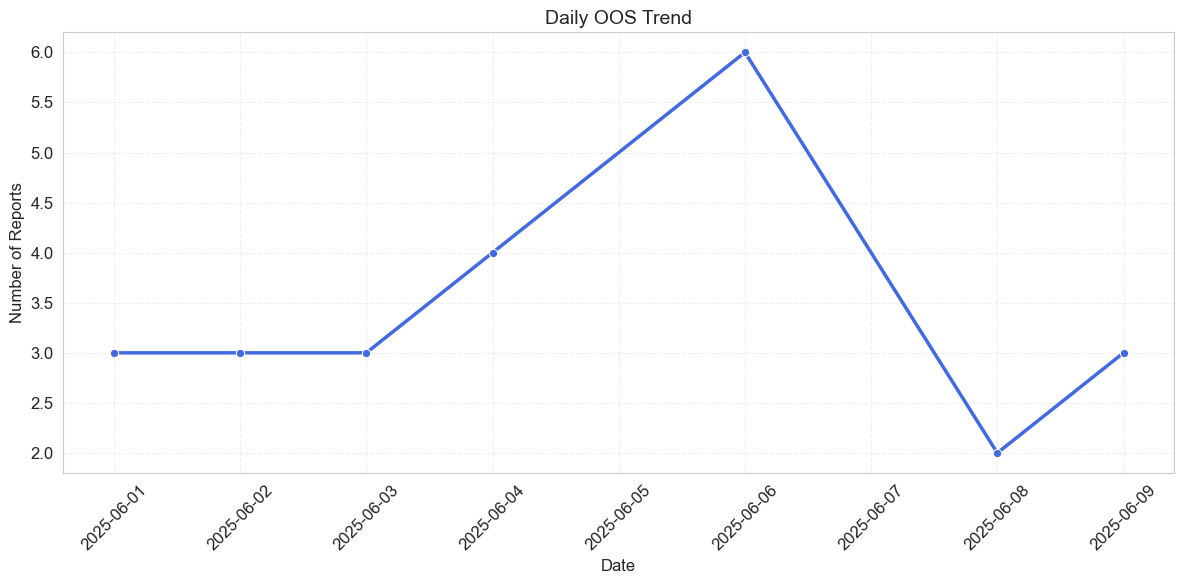

In [38]:
total = len(df)
for i, v in enumerate(category_counts.values):
    percentage = f'{(v/total)*100:.1f}%'
    ax.text(v + 0.2, i, percentage, va='center')

plt.tight_layout()
plt.show()


top_products = df['Product'].value_counts().head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top_products.values,
    y=top_products.index,
    palette="magma"
)
plt.title('Top 10 OOS Products', fontsize=14)
plt.xlabel('Report Count')
plt.ylabel('Product')

for i, v in enumerate(top_products.values):
    ax.text(v + 0.1, i, str(v), va='center')

plt.tight_layout()
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# By day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['Day'].value_counts().reindex(day_order)
sns.barplot(
    x=day_counts.index, 
    y=day_counts.values, 
    ax=ax1, 
    palette="coolwarm"
)
ax1.set_title('Reports by Day of Week')
ax1.set_xlabel('')
ax1.set_ylabel('Report Count')

# By hour of day
hour_counts = df['Hour'].value_counts().sort_index()
sns.lineplot(
    x=hour_counts.index, 
    y=hour_counts.values, 
    ax=ax2, 
    marker='o',
    linewidth=2.5,
    color='darkorange'
)
ax2.set_title('Hourly Distribution of Reports')
ax2.set_xlabel('Hour of Day (24h)')
ax2.set_ylabel('Report Count')
ax2.set_xticks(range(0, 24))
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
reporter_counts = df['Reporter'].value_counts().head(8)
ax = sns.barplot(
    x=reporter_counts.values,
    y=reporter_counts.index,
    palette="rocket"
)
plt.title('Most Active Reporters', fontsize=14)
plt.xlabel('Report Count')
plt.ylabel('Reporter')


total = len(df)
for i, v in enumerate(reporter_counts.values):
    percentage = f'{(v/total)*100:.1f}%'
    ax.text(v + 0.1, i, f'{v} ({percentage})', va='center')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
daily_trend = df.groupby('Date').size()
sns.lineplot(
    x=daily_trend.index, 
    y=daily_trend.values,
    marker='o',
    linewidth=2.5,
    color='royalblue'
)
plt.title('Daily OOS Trend', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [36]:
!!pip install pandas matplotlib seaborn openpyxl

['Requirement already satisfied: pandas in c:\\users\\abdul\\anaconda3\\lib\\site-packages (2.2.2)',
 'Requirement already satisfied: matplotlib in c:\\users\\abdul\\anaconda3\\lib\\site-packages (3.9.2)',
 'Requirement already satisfied: seaborn in c:\\users\\abdul\\anaconda3\\lib\\site-packages (0.13.2)',
 'Requirement already satisfied: openpyxl in c:\\users\\abdul\\anaconda3\\lib\\site-packages (3.1.5)',
 'Requirement already satisfied: numpy>=1.26.0 in c:\\users\\abdul\\anaconda3\\lib\\site-packages (from pandas) (1.26.4)',
 'Requirement already satisfied: python-dateutil>=2.8.2 in c:\\users\\abdul\\anaconda3\\lib\\site-packages (from pandas) (2.9.0.post0)',
 'Requirement already satisfied: pytz>=2020.1 in c:\\users\\abdul\\anaconda3\\lib\\site-packages (from pandas) (2024.1)',
 'Requirement already satisfied: tzdata>=2022.7 in c:\\users\\abdul\\anaconda3\\lib\\site-packages (from pandas) (2023.3)',
 'Requirement already satisfied: contourpy>=1.0.1 in c:\\users\\abdul\\anaconda3\\